# Case Study : Telecom Churn

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

### Business Goal

Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## EDA

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
input_data = pd.read_csv("telecom_churn_data.csv")
input_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
input_data.shape

(99999, 226)

In [5]:
input_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
for i in range(0,226):
    print(input_data.columns[i])

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

### Customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
 

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [7]:
#first we need to filter out high value customers in the good phase
#criteria for filtering is the recharge amount is >= 70th percentile of the average recharge amount in the first two months

input_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0               362               252               252                 0   
1                74               384               283               121   
2               168               315               116               358   
3               230               310               601               410   
4               196               350               287               200   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  
0                1.0                1.0                1.0                NaN  
1                NaN                1.0                2.0                NaN  
2                NaN                NaN                NaN                1.0  
3                NaN                NaN                NaN                NaN  
4                1.0                NaN                NaN                NaN

In [8]:
## we need to treat missing values
input_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]= input_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(value=0, axis=0)

In [9]:
input_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0               362               252               252                 0   
1                74               384               283               121   
2               168               315               116               358   
3               230               310               601               410   
4               196               350               287               200   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  
0                1.0                1.0                1.0                0.0  
1                0.0                1.0                2.0                0.0  
2                0.0                0.0                0.0                1.0  
3                0.0                0.0                0.0                0.0  
4                1.0                0.0                0.0                0.0

In [10]:
input_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].isnull().sum()

total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_amt_9     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
total_rech_data_9    0
dtype: int64

In [11]:
input_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].head()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 NaN               154.0                50.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                56.0                 NaN                 NaN   

   av_rech_amt_data_9  
0                 NaN  
1                 NaN  
2                46.0  
3                 NaN  
4                 NaN

In [12]:
## we need to treat missing values
input_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]=input_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].fillna(value=0, axis=0)

In [13]:
input_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].isnull().sum()

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [14]:
# lets calculate the average recharge amount for the good phase i.e. 6 & 7 months
input_data['total_rech_amt_data_6'] = input_data['av_rech_amt_data_6'] * input_data['total_rech_data_6']
input_data['total_rech_amt_data_7'] = input_data['av_rech_amt_data_7'] * input_data['total_rech_data_7']
input_data['total_rech_amt_data_8'] = input_data['av_rech_amt_data_8'] * input_data['total_rech_data_8']
input_data['total_rech_amt_data_9'] = input_data['av_rech_amt_data_9'] * input_data['total_rech_data_9']

In [15]:
# lets drop the columns that are not needed
input_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'], axis=1, inplace=True)
input_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'], axis=1, inplace=True)

In [16]:
input_data.shape

(99999, 222)

In [17]:
# lets find the 70% of the total recharge amount done in each month of the good phase i.e. june and july
avg_rech_amt_good_phase = (input_data['total_rech_amt_6']+input_data['total_rech_amt_data_6']+input_data['total_rech_amt_7']+input_data['total_rech_amt_data_7'])/2
print(avg_rech_amt_good_phase)

0          559.000
1          306.000
2          241.500
3          270.000
4          301.000
5           60.000
6          360.500
7         1185.000
8          696.000
9          284.500
10           0.000
11         183.000
12         110.000
13         380.000
14          50.000
15         343.000
16         459.000
17         408.000
18          45.000
19         378.000
20         343.500
21         640.000
22         142.500
23         583.000
24         385.000
25         311.000
26         154.000
27          30.000
28          96.500
29          98.000
30          86.000
31         305.500
32         193.000
33       14786.500
34         241.000
35         200.500
36         125.000
37          25.000
38         528.000
39         308.000
40         252.000
41         503.000
42         161.000
43         210.000
44         398.000
45         125.000
46         161.000
47         342.000
48        1448.500
49          66.000
50         154.000
51         282.500
52         1

In [18]:
# filter the records that have avg amount above 70%
avg_rech_amt_70 = np.percentile(avg_rech_amt_good_phase,70.0)
print(avg_rech_amt_70)

478.0


In [19]:
input_data_70 = input_data[avg_rech_amt_good_phase >= avg_rech_amt_70]

In [20]:
input_data_70.shape

(30001, 222)

After removing the records whose average recharge amount is less than 70% of total avg recharge amount, we have 30K records left with us. These all are high value customers.

In [21]:
# lets define a target variable now as Churn.
# customers who have not used any facilities such as ic, og, sms etc and have generated revenue lass than 4 rs a month
# no usage at all at for given period of time
input_data_70['churn'] = np.where(input_data_70[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
input_data_70.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [22]:
input_data_70['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

There is data imbalance in the churn ratio.

In [23]:
input_data_70.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], axis=1, inplace=True)
input_data_70.shape

(30001, 219)

In [24]:
# let us check for null values
print(((input_data_70.isnull().sum()/len(input_data_70))*100).sort_values(ascending=False))

count_rech_3g_9             49.268358
date_of_last_rech_data_9    49.268358
arpu_3g_9                   49.268358
max_rech_data_9             49.268358
arpu_2g_9                   49.268358
count_rech_2g_9             49.268358
fb_user_9                   49.268358
night_pck_user_9            49.268358
date_of_last_rech_data_8    46.825106
max_rech_data_8             46.825106
count_rech_2g_8             46.825106
fb_user_8                   46.825106
count_rech_3g_8             46.825106
night_pck_user_8            46.825106
arpu_2g_8                   46.825106
arpu_3g_8                   46.825106
count_rech_3g_6             44.148528
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
count_rech_2g_6             44.148528
fb_user_6                   44.148528
max_rech_data_6             44.148528
arpu_2g_6                   44.148528
date_of_last_rech_data_6    44.148528
date_of_last_rech_data_7    43.145228
fb_user_7                   43.145228
arpu_2g_7   

In [25]:
# columns having null values > 30% can be dropped directly as they add no meaning to the prediciton. But don't remove columns having _9 in it.

for col in input_data_70.columns:
    if(col.endswith("_9") == False):
        if((input_data_70[col].isnull().sum()/len(input_data_70))*100 > 30):
            input_data_70.drop([col],axis=1,inplace=True)
        
input_data_70.shape

(30001, 195)

In [26]:
# lets drop rows having null values.
for col in input_data_70.columns:
        if((input_data_70[col].isnull().sum()/len(input_data_70))*100 < 7):
            input_data_70.dropna(subset=[col], axis=0, inplace=True)

input_data_70.shape

(27121, 195)

In [27]:
print(((input_data_70.isnull().sum()/len(input_data_70))*100).sort_values(ascending=False))

date_of_last_rech_data_9    46.078684
fb_user_9                   46.078684
arpu_2g_9                   46.078684
arpu_3g_9                   46.078684
count_rech_3g_9             46.078684
count_rech_2g_9             46.078684
max_rech_data_9             46.078684
night_pck_user_9            46.078684
ic_others_9                  0.000000
ic_others_8                  0.000000
total_rech_amt_7             0.000000
total_rech_amt_6             0.000000
spl_ic_mou_8                 0.000000
spl_ic_mou_9                 0.000000
isd_ic_mou_6                 0.000000
isd_ic_mou_7                 0.000000
isd_ic_mou_8                 0.000000
isd_ic_mou_9                 0.000000
total_rech_num_9             0.000000
total_rech_num_8             0.000000
total_rech_num_7             0.000000
spl_ic_mou_7                 0.000000
ic_others_6                  0.000000
total_rech_num_6             0.000000
ic_others_7                  0.000000
mobile_number                0.000000
spl_ic_mou_6

In [28]:
# lets check the unique value columns and drop them as they are give us no additional info or insight into the data
for col in input_data_70.columns:
    if input_data_70[col].nunique() == 1:
        input_data_70.drop(col,axis=1,inplace = True)
        
input_data_70.shape

(27121, 179)

In [29]:
# lets check the datatypes and values of each columns
input_data_70_obj = input_data_70.select_dtypes(include=['object'])
print(input_data_70_obj.head())

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
8            6/25/2014           7/31/2014           8/30/2014   
21           6/30/2014           7/31/2014           8/31/2014   
23           6/18/2014            7/7/2014           8/24/2014   
33           6/30/2014           7/30/2014           8/26/2014   
38           6/30/2014           7/28/2014           8/24/2014   

   date_of_last_rech_9 date_of_last_rech_data_9  
8            9/30/2014                      NaN  
21           9/30/2014                      NaN  
23           9/28/2014                 9/9/2014  
33           9/28/2014                9/10/2014  
38           9/26/2014                9/26/2014  


In [30]:
# convert it to datetime
for col in input_data_70_obj.columns:
    input_data_70[col] = pd.to_datetime(input_data_70[col])

In [31]:
print(((input_data_70.isnull().sum()/len(input_data_70))*100).sort_values(ascending=False))

count_rech_3g_9             46.078684
night_pck_user_9            46.078684
arpu_2g_9                   46.078684
arpu_3g_9                   46.078684
date_of_last_rech_data_9    46.078684
max_rech_data_9             46.078684
count_rech_2g_9             46.078684
fb_user_9                   46.078684
total_rech_num_8             0.000000
ic_others_7                  0.000000
ic_others_8                  0.000000
ic_others_9                  0.000000
total_rech_num_6             0.000000
total_rech_num_7             0.000000
mobile_number                0.000000
total_rech_num_9             0.000000
isd_ic_mou_9                 0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
ic_others_6                  0.000000
isd_ic_mou_8                 0.000000
max_rech_amt_9               0.000000
std_ic_mou_7

In [32]:
# treating missing values for 9th month
input_data_70['max_rech_data_9'] = input_data_70['max_rech_data_9'].fillna(0)
input_data_70['night_pck_user_9'] = input_data_70['night_pck_user_9'].fillna(0)
input_data_70['fb_user_9'] = input_data_70['fb_user_9'].fillna(0)
input_data_70['count_rech_2g_9'] = input_data_70['count_rech_2g_9'].fillna(0)
input_data_70['count_rech_3g_9'] = input_data_70['count_rech_3g_9'].fillna(0)
input_data_70['arpu_3g_9'] = input_data_70['arpu_3g_9'].fillna(0)
input_data_70['arpu_2g_9'] = input_data_70['arpu_2g_9'].fillna(0)

In [33]:
print(((input_data_70.isnull().sum()/len(input_data_70))*100).sort_values(ascending=False))

date_of_last_rech_data_9    46.078684
mobile_number                0.000000
total_rech_amt_6             0.000000
ic_others_6                  0.000000
ic_others_7                  0.000000
ic_others_8                  0.000000
ic_others_9                  0.000000
total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_num_9             0.000000
total_rech_amt_7             0.000000
isd_ic_mou_8                 0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_6          0.000000
date_of_last_rech_7          0.000000
isd_ic_mou_9                 0.000000
isd_ic_mou_7                 0.000000
date_of_last_rech_9          0.000000
isd_ic_mou_6                 0.000000
std_ic_t2m_mou_6             0.000000
std_ic_t2m_m

In [34]:
input_data_70.shape

(27121, 179)

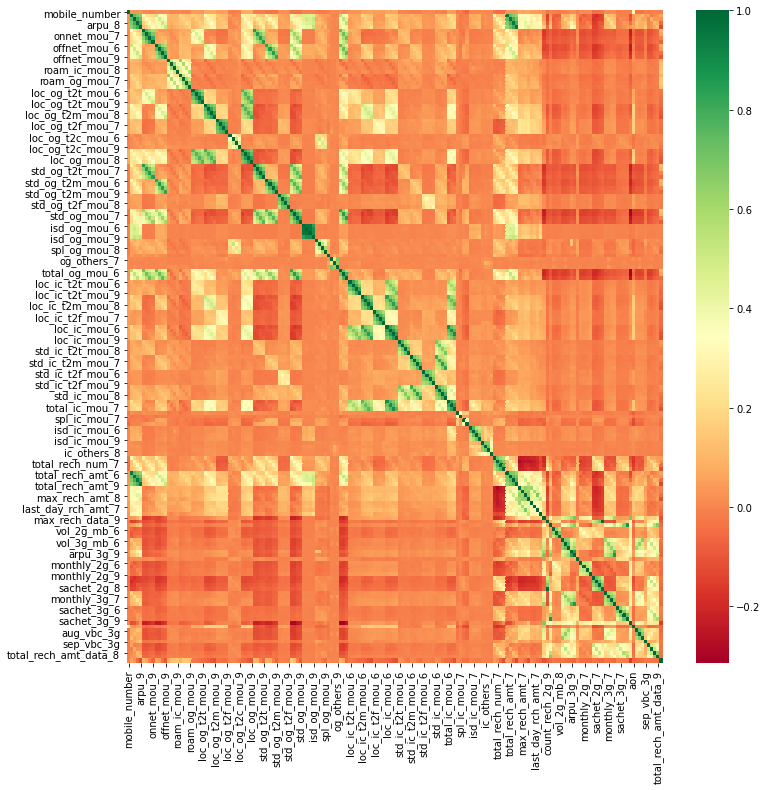

In [35]:
corr_data = input_data_70.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_data, cmap="RdYlGn")
plt.show()

In [36]:
input_data_70.shape

(27121, 179)

## Deriving new features

In [37]:
# Lets try to derive new features
for i in range(0,len(input_data_70.columns)):
    print(input_data_70.columns[i])

mobile_number
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
spl_og_mou_9
og_others_6
og_others_7
og_others_8
og_others_9
total_og_mou_6

In [38]:
# since months 6 & 7 are good phase, we will average out the values for these columns into a new column
inp_numeric = input_data_70.select_dtypes(include=['float64','int64'])
col_list = inp_numeric.filter(regex='_6|_7').columns.str[:-2]
for i, col in enumerate(col_list.unique()):
    new_col_name = 'avg_'+col+'_67'
    print(col, new_col_name)
    col_6 = col+'_6'
    col_7 = col+'_7'
    input_data_70[new_col_name] = (input_data_70[col_6]+input_data_70[col_7])/2
    
input_data_70.shape

arpu avg_arpu_67
onnet_mou avg_onnet_mou_67
offnet_mou avg_offnet_mou_67
roam_ic_mou avg_roam_ic_mou_67
roam_og_mou avg_roam_og_mou_67
loc_og_t2t_mou avg_loc_og_t2t_mou_67
loc_og_t2m_mou avg_loc_og_t2m_mou_67
loc_og_t2f_mou avg_loc_og_t2f_mou_67
loc_og_t2c_mou avg_loc_og_t2c_mou_67
loc_og_mou avg_loc_og_mou_67
std_og_t2t_mou avg_std_og_t2t_mou_67
std_og_t2m_mou avg_std_og_t2m_mou_67
std_og_t2f_mou avg_std_og_t2f_mou_67
std_og_mou avg_std_og_mou_67
isd_og_mou avg_isd_og_mou_67
spl_og_mou avg_spl_og_mou_67
og_others avg_og_others_67
total_og_mou avg_total_og_mou_67
loc_ic_t2t_mou avg_loc_ic_t2t_mou_67
loc_ic_t2m_mou avg_loc_ic_t2m_mou_67
loc_ic_t2f_mou avg_loc_ic_t2f_mou_67
loc_ic_mou avg_loc_ic_mou_67
std_ic_t2t_mou avg_std_ic_t2t_mou_67
std_ic_t2m_mou avg_std_ic_t2m_mou_67
std_ic_t2f_mou avg_std_ic_t2f_mou_67
std_ic_mou avg_std_ic_mou_67
total_ic_mou avg_total_ic_mou_67
spl_ic_mou avg_spl_ic_mou_67
isd_ic_mou avg_isd_ic_mou_67
ic_others avg_ic_others_67
total_rech_num avg_total_rech_nu

(27121, 220)

In [39]:
# lets drop the columns from which we derived values
to_drop_cols = inp_numeric.filter(regex='_6|_7').columns

telecom_data = input_data_70.drop(to_drop_cols, axis =1)
telecom_data.shape

(27121, 138)

In [40]:
# since months 6 & 7 are good phase, we will average out the values for these columns into a new column
col_list = inp_numeric.filter(regex='jun_|jul_').columns.str[4:]
for i, col in enumerate(col_list.unique()):
    new_col_name = 'avg_'+col+'_67'
    col_6 = 'jun_'+col
    col_7 = 'jul_'+col
    input_data_70[new_col_name] = (input_data_70[col_6]+input_data_70[col_7])/2
    #print(new_col_name)
    
input_data_70.shape

(27121, 221)

In [41]:
# lets drop the columns from which we derived values
to_drop_cols = inp_numeric.filter(regex='jun_|jul_').columns

telecom_data = telecom_data.drop(to_drop_cols, axis =1)
telecom_data.shape

(27121, 136)

In [42]:
# lets try to find out if there are higly correlated variables which can be dropped right away
corr_matrix = telecom_data.corr().abs()

In [43]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                            mobile_number    arpu_8    arpu_9  onnet_mou_8  \
mobile_number                         NaN  0.027791  0.034116     0.003569   
arpu_8                                NaN       NaN  0.809276     0.332479   
arpu_9                                NaN       NaN       NaN     0.244614   
onnet_mou_8                           NaN       NaN       NaN          NaN   
onnet_mou_9                           NaN       NaN       NaN          NaN   
offnet_mou_8                          NaN       NaN       NaN          NaN   
offnet_mou_9                          NaN       NaN       NaN          NaN   
roam_ic_mou_8                         NaN       NaN       NaN          NaN   
roam_ic_mou_9                         NaN       NaN       NaN          NaN   
roam_og_mou_8                         NaN       NaN       NaN          NaN   
roam_og_mou_9                         NaN       NaN       NaN          NaN   
loc_og_t2t_mou_8                      NaN       NaN       NaN   

In [44]:
# I am taking a cutoff of 0.80 to limit the high covariance
to_drop_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.85)]
print(to_drop_cols)

['loc_og_mou_9', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_9', 'total_ic_mou_8', 'total_rech_amt_8', 'total_rech_amt_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'avg_std_og_t2t_mou_67', 'avg_isd_og_mou_67', 'avg_total_ic_mou_67', 'avg_total_rech_amt_67']


In [45]:
# lets drop the columns that are highly correlated i.e have corr > 85%
telecom_data = telecom_data.drop(to_drop_cols, axis=1)
print(telecom_data.shape)

(27121, 122)


In [46]:
# lets try to plot some data for further analysis
telecom_data.head()

mobile_number   arpu_8   arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  \
8      7001524846  137.362  166.787        35.08        33.46        136.48   
21     7002124215  637.760  578.596        85.14       161.63        983.39   
23     7000887461  366.966  811.480        33.58        15.74        205.89   
33     7000149764  409.230  799.356         0.00         0.00          0.00   
38     7000815202  393.909  391.709       666.38       494.79         97.81   

    offnet_mou_9  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  \
8         108.71            0.0            0.0            0.0            0.0   
21        869.89            0.0            0.0            0.0            0.0   
23        111.88            0.0            0.0            0.0            0.0   
33          0.00            0.0            0.0            0.0            0.0   
38        213.24            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
8              12.49             26.13             50.54             34.58   
21             23.34             29.98            104.81            107.54   
23             33.58             15.74            148.56             83.73   
33              0.00              0.00              0.00              0.00   
38              9.48             16.39             18.96             49.96   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
8               0.00              0.00              7.15              0.00   
21              1.58              0.00              0.00              0.00   
23              0.00              2.45             17.71              4.08   
33              0.00              0.00              0.56              0.00   
38              0.00              0.00              0.00              0.00   

    loc_og_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_8  \
8          63.04              7.33             74.13               0.0   
21        129.74            131.64            762.34               0.0   
23        182.14              0.00             11.44               0.0   
33          0.00              0.00              0.00               0.0   
38         28.44            478.39            163.16               0.0   

    std_og_t2f_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  spl_og_mou_8  \
8               0.00         98.28         81.46           0.0         10.23   
21              0.00        938.79        893.99           0.0          0.00   
23              3.89         39.61         15.34           0.0         17.71   
33              0.00          0.00          0.00           0.0          0.56   
38              0.00        735.74        641.56           0.0          0.00   

    spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  loc_ic_t2t_mou_8  \
8           0.00          0.0          0.0          171.56              0.31   
21          0.00          0.0          0.0         1068.54             19.54   
23         10.35          0.0          0.0          239.48             76.64   
33          0.00          0.0          0.0            0.56              2.45   
38          0.11          0.0          0.0          764.19              1.36   

    loc_ic_t2t_mou_9  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_8  \
8               4.03             15.48             17.34              0.00   
21             17.99            129.16            113.46             10.39   
23             45.36            146.84             75.83              0.71   
33              0.41             37.93              8.01              0.16   
38             18.56             28.06             31.74              0.00   

    loc_ic_t2f_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_8  \
8               0.00         15.79         21.38              0.10   
21              8.41        159.11        139.88              0.18   
23              0.00    

In [47]:
# lets see if outliers are present in important fields.
telecom_data['aon'].quantile([0.2,0.5,0.7,0.9,1])

0.2     411.0
0.5     888.0
0.7    1546.0
0.9    2830.0
1.0    4321.0
Name: aon, dtype: float64

In [48]:
# lets convert AON in months
telecom_data['aon_mon'] = telecom_data['aon']/30
telecom_data.drop(['aon'], axis =1, inplace=True)

In [49]:
#lets plot pairplots for good phase first
num_fields = telecom_data.select_dtypes(include=['float64','int64'])
col_list = num_fields.filter(regex='_67').columns
len(col_list)

37

In [50]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [51]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [52]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

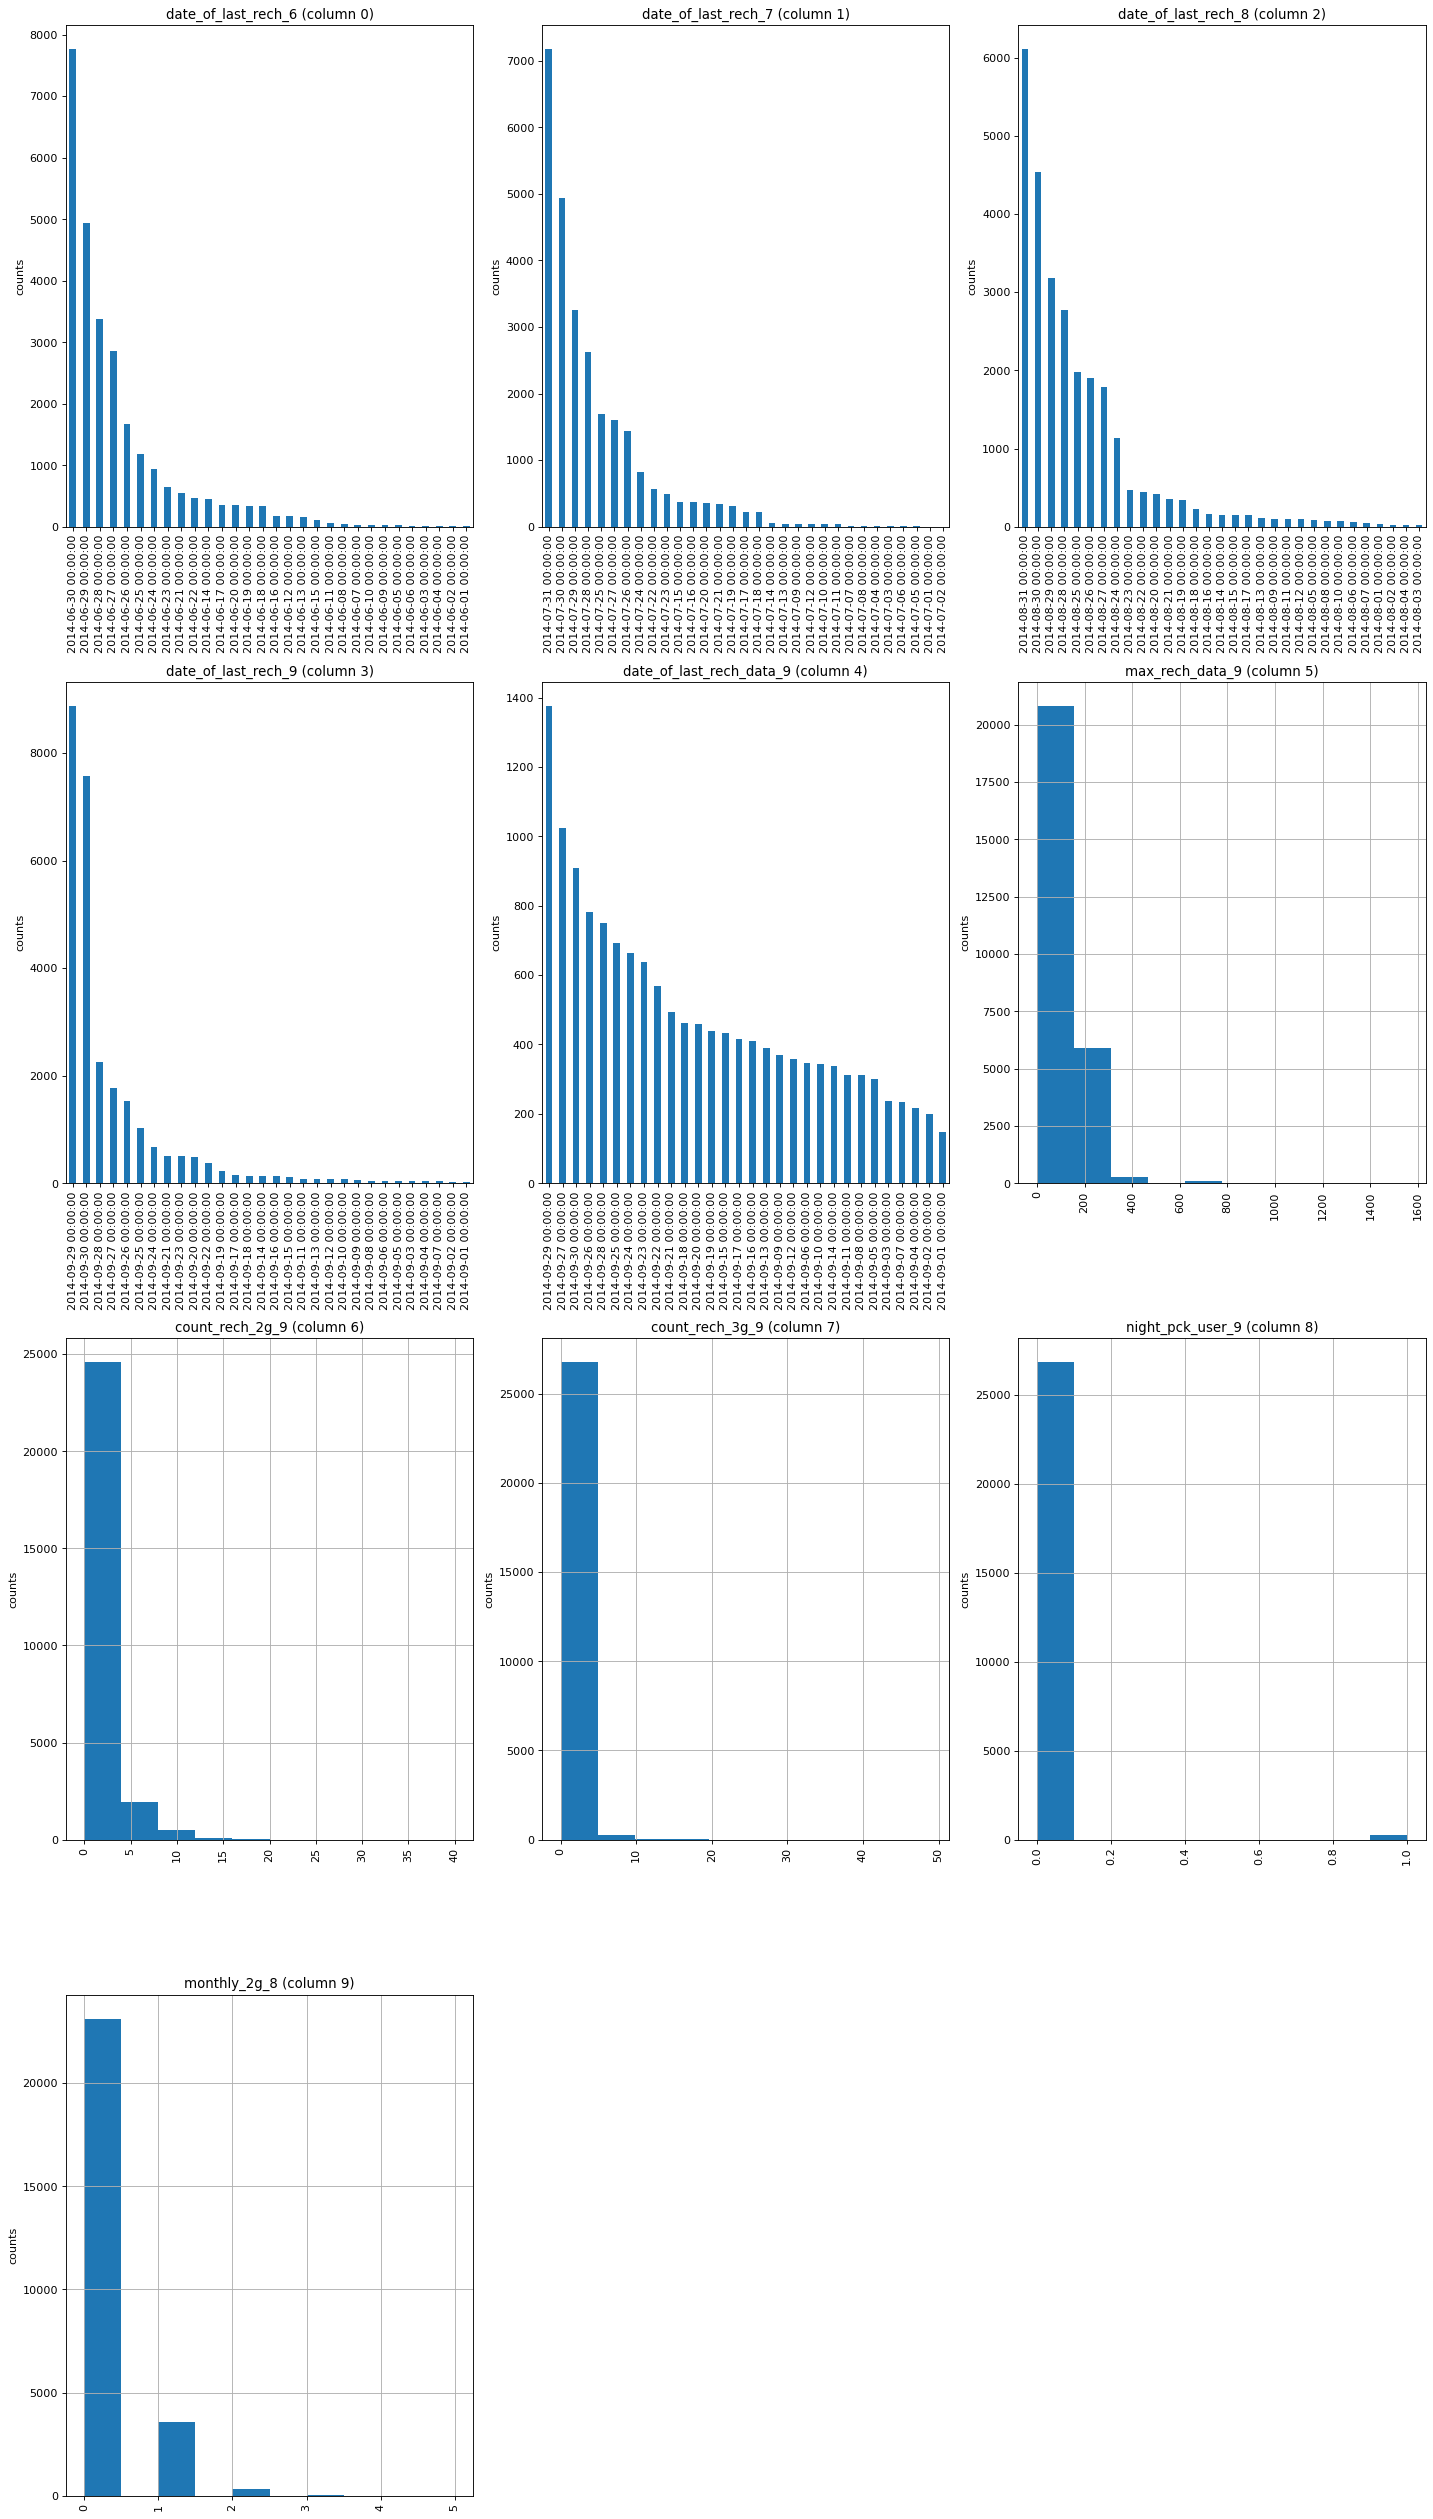

In [53]:
plotPerColumnDistribution(telecom_data, 10, 3)

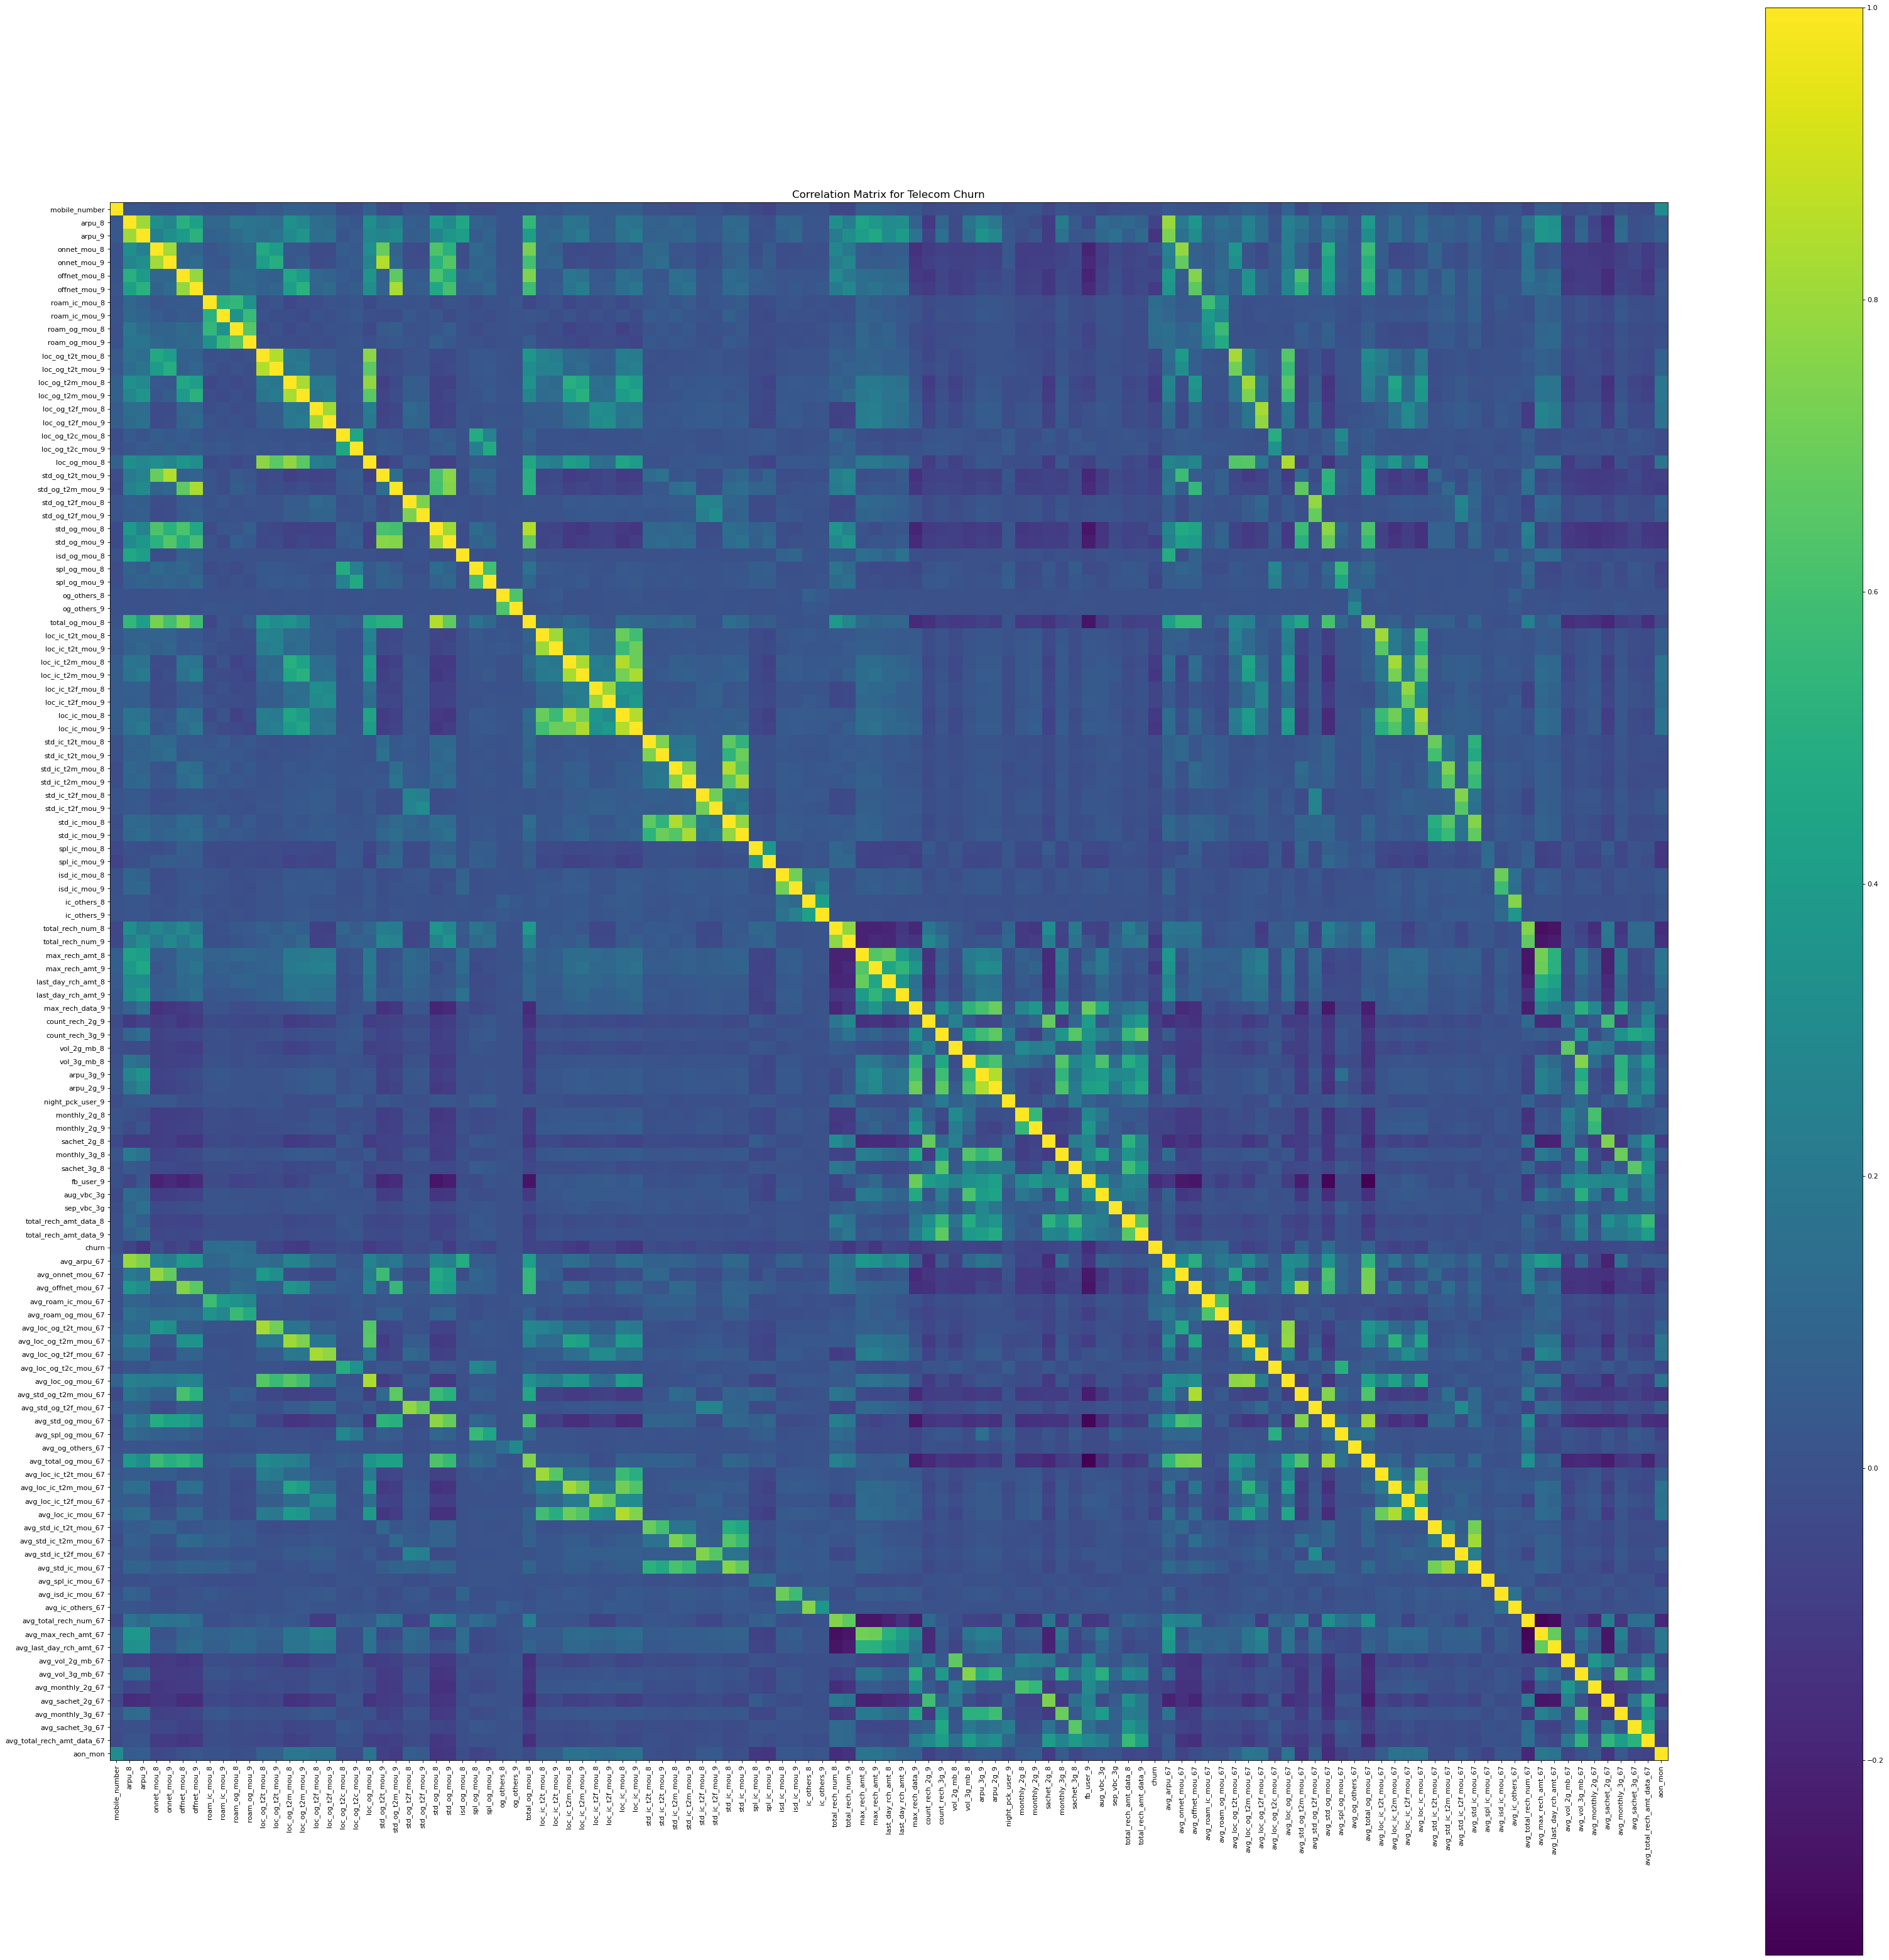

In [54]:
plotCorrelationMatrix(telecom_data, 50)

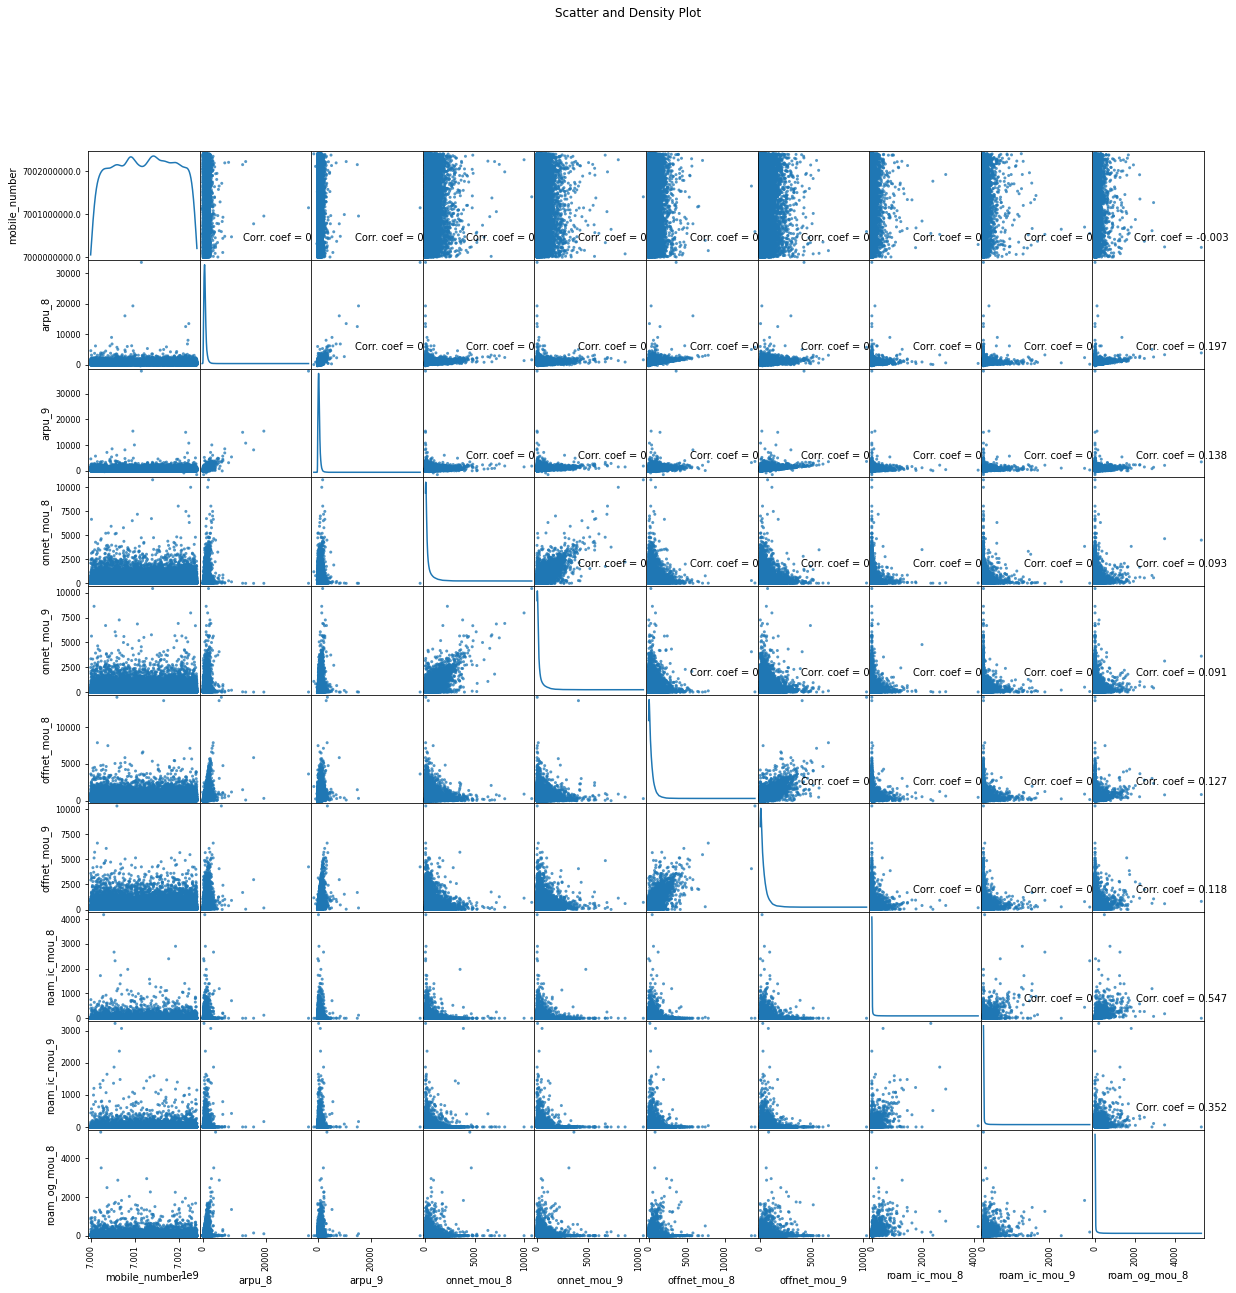

In [55]:
plotScatterMatrix(telecom_data, 20, 10)

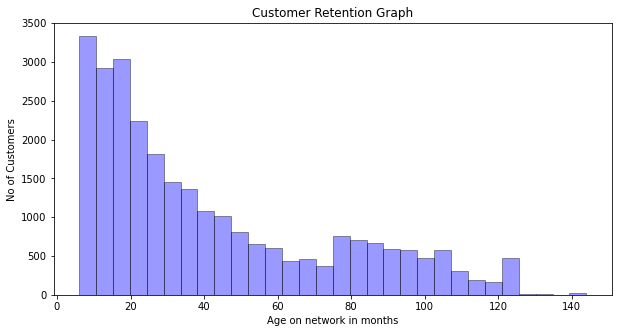

In [56]:
# lets check how age on network performs with churn
plt.figure(figsize=[10,5])
ax = sns.distplot(telecom_data['aon_mon'], hist=True, kde=False, 
             bins=int(180/6), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Age on network in months')
ax.set_title('Customer Retention Graph')
plt.show()

we can see that the number of customers are decreasing with increase in the age on network. Customers on this network are not loyal for a long period of time.


In [57]:
# for simplicity, lets distribute the tenure in small parts
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['aon_mon'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
38        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [58]:
telecom_data['tenure_range'].value_counts()

2-5 Yrs            8826
1-2 Yrs            7010
6-12 Months        4333
5 Yrs and above     133
0-6 Months           12
Name: tenure_range, dtype: int64

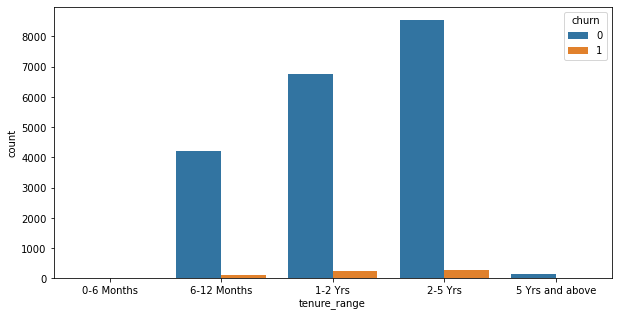

In [59]:
# lets check how age on network performs with churn
plt.figure(figsize=[10,5])
sns.countplot(data=telecom_data, x = 'tenure_range',hue='churn')
plt.show()

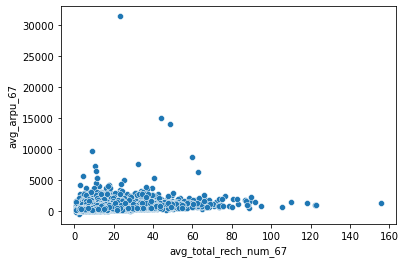

In [60]:
# lets check the average revenue versus the average recharge amount for good phase
sns.scatterplot(data=telecom_data, x='avg_total_rech_num_67', y='avg_arpu_67')
plt.show()

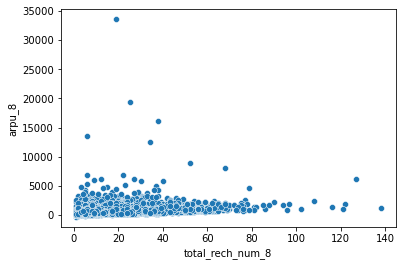

In [61]:
# lets check the average revenue from 8th month versus the recharge amount in 8th month
sns.scatterplot(data=telecom_data, x='total_rech_num_8', y='arpu_8')
plt.show()

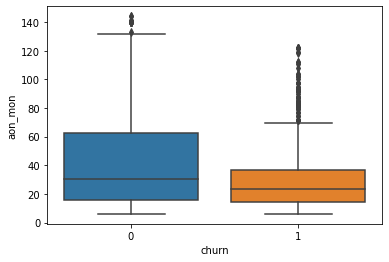

In [62]:
#lets see how AON performs with churn
sns.boxplot(data = telecom_data, x = 'churn', y = 'aon_mon')
plt.show()

- above plot shows that customers that have spent more time on network are less likely to churn

In [63]:
# lets see how date affects the churn variable
rem_cols = telecom_data.select_dtypes(exclude=['int64','float64']).columns
print(rem_cols)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_9', 'churn',
       'tenure_range'],
      dtype='object')


In [64]:
telecom_data[rem_cols].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
8           2014-06-25          2014-07-31          2014-08-30   
21          2014-06-30          2014-07-31          2014-08-31   
23          2014-06-18          2014-07-07          2014-08-24   
33          2014-06-30          2014-07-30          2014-08-26   
38          2014-06-30          2014-07-28          2014-08-24   

   date_of_last_rech_9 date_of_last_rech_data_9  churn tenure_range  
8           2014-09-30                      NaT      0  6-12 Months  
21          2014-09-30                      NaT      0      1-2 Yrs  
23          2014-09-28               2014-09-09      0      1-2 Yrs  
33          2014-09-28               2014-09-10      0      2-5 Yrs  
38          2014-09-26               2014-09-26      0      2-5 Yrs

In [65]:
telecom_data['no_of_days_last_rech_6'] = pd.to_timedelta(telecom_data['date_of_last_rech_6'] - (telecom_data['date_of_last_rech_6'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)), unit='d').dt.days
telecom_data['no_of_days_last_rech_7'] = pd.to_timedelta(telecom_data['date_of_last_rech_7'] - (telecom_data['date_of_last_rech_7'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)), unit='d').dt.days
telecom_data['no_of_days_last_rech_8'] = pd.to_timedelta(telecom_data['date_of_last_rech_8'] - (telecom_data['date_of_last_rech_8'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)), unit='d').dt.days

In [66]:
telecom_data['no_of_days_last_rech_9'] = pd.to_timedelta(telecom_data['date_of_last_rech_9'] - (telecom_data['date_of_last_rech_9'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)), unit='d').dt.days
telecom_data['no_of_days_rech_data_9'] = pd.to_timedelta(telecom_data['date_of_last_rech_data_9'] - (telecom_data['date_of_last_rech_data_9'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)), unit='d').dt.days

In [67]:
telecom_data[['no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8','no_of_days_last_rech_9','date_of_last_rech_data_9']].head()

no_of_days_last_rech_6  no_of_days_last_rech_7  no_of_days_last_rech_8  \
8                       24                      30                      29   
21                      29                      30                      30   
23                      17                       6                      23   
33                      29                      29                      25   
38                      29                      27                      23   

    no_of_days_last_rech_9 date_of_last_rech_data_9  
8                       29                      NaT  
21                      29                      NaT  
23                      27               2014-09-09  
33                      27               2014-09-10  
38                      25               2014-09-26

In [68]:
telecom_data[['no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8','no_of_days_last_rech_9','no_of_days_rech_data_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27121 entries, 8 to 99997
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   no_of_days_last_rech_6  27121 non-null  int64  
 1   no_of_days_last_rech_7  27121 non-null  int64  
 2   no_of_days_last_rech_8  27121 non-null  int64  
 3   no_of_days_last_rech_9  27121 non-null  int64  
 4   no_of_days_rech_data_9  14624 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.2 MB


In [69]:
telecom_data.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_9'], axis=1, inplace=True)

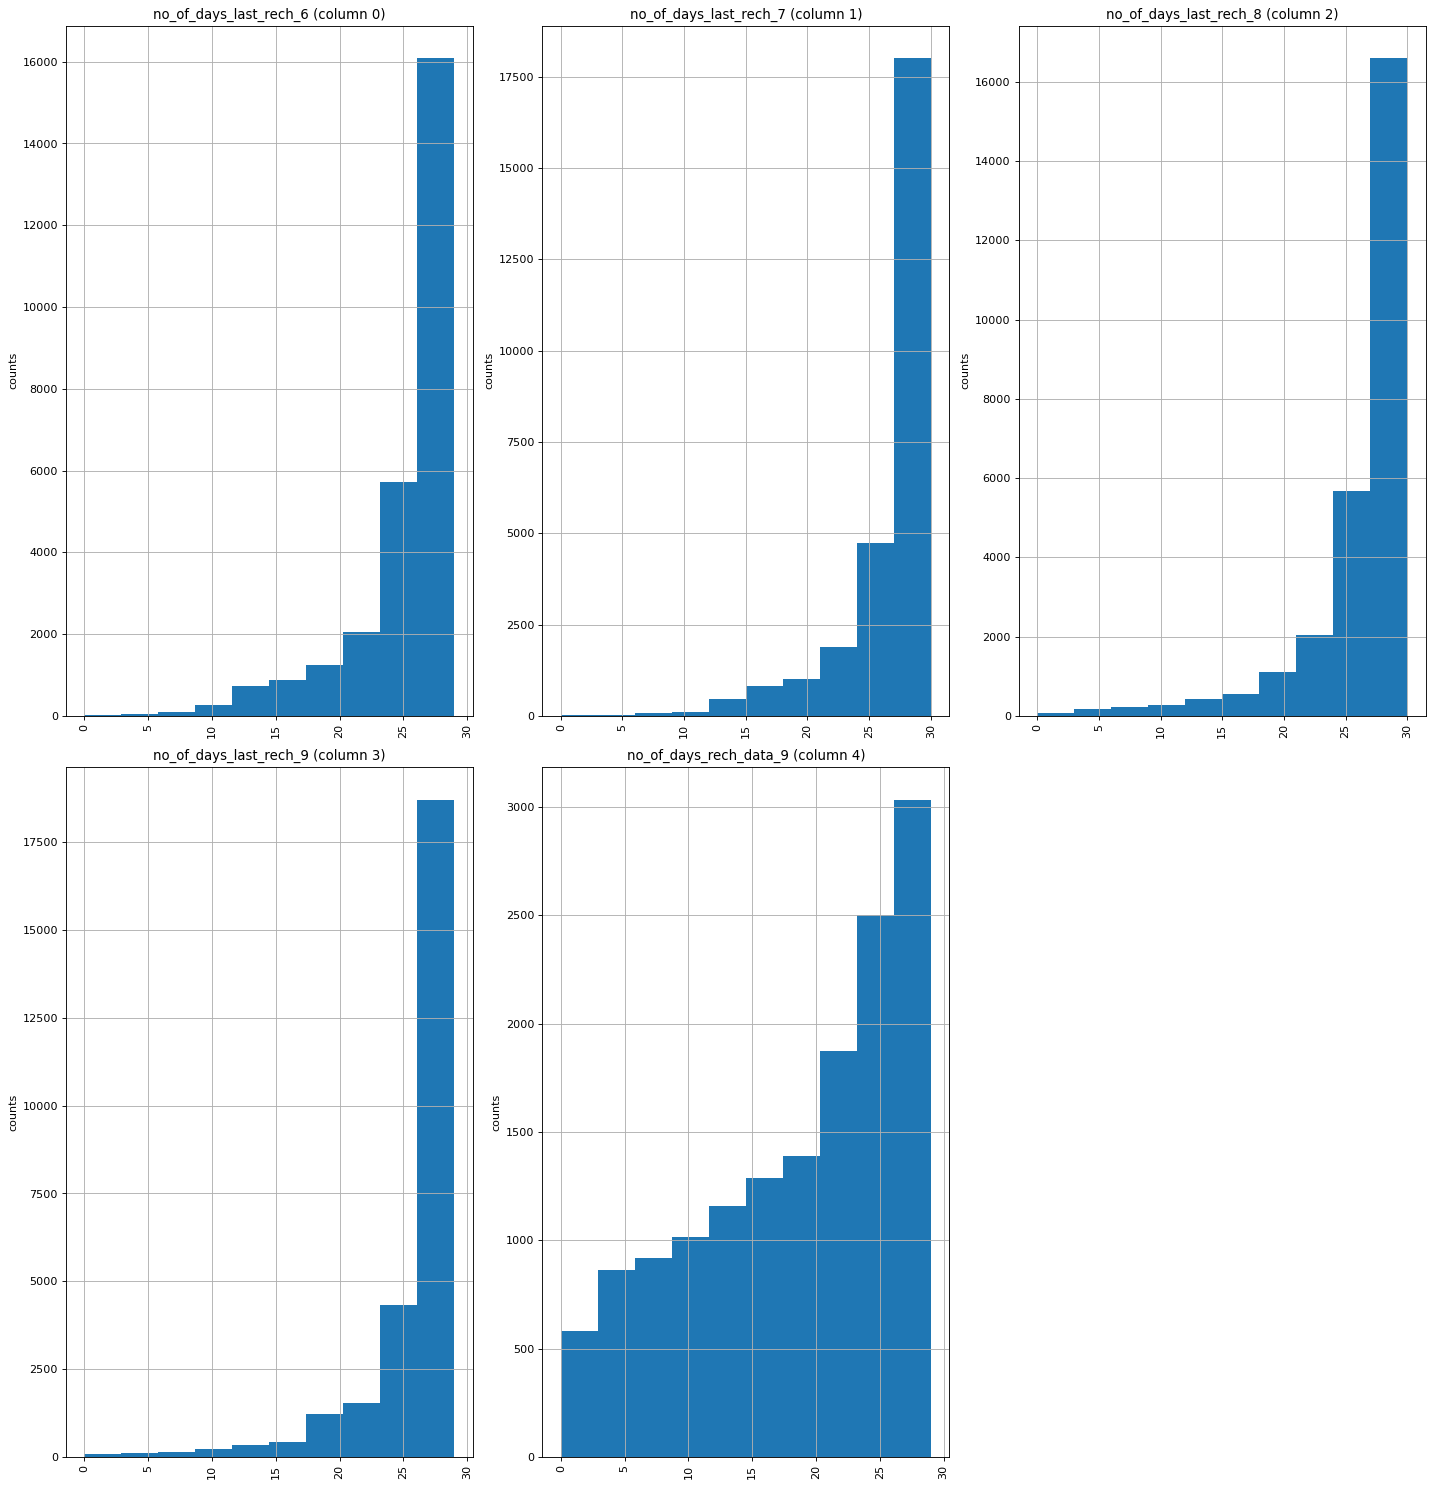

In [70]:
day_cols = ['no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8','no_of_days_last_rech_9','no_of_days_rech_data_9']
plotPerColumnDistribution(telecom_data[day_cols], 10, 3)

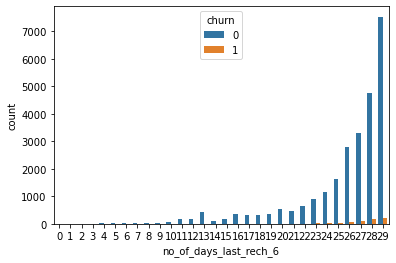

In [71]:
sns.countplot(data=telecom_data, x= 'no_of_days_last_rech_6', hue='churn')
plt.show()

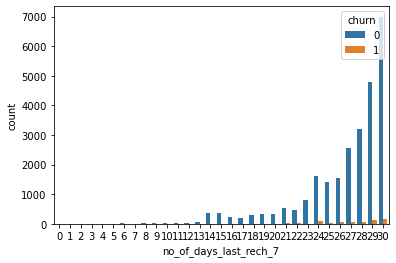

In [72]:
sns.countplot(data=telecom_data, x= 'no_of_days_last_rech_7', hue='churn')
plt.show()

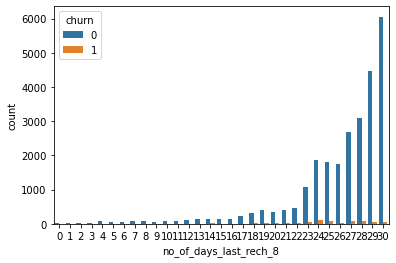

In [73]:
sns.countplot(data=telecom_data, x= 'no_of_days_last_rech_8', hue='churn')
plt.show()

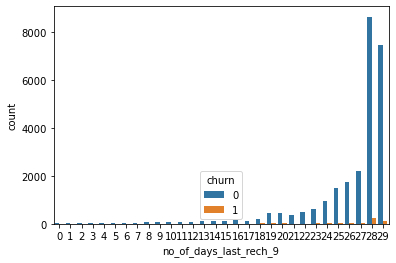

In [74]:
sns.countplot(data=telecom_data, x= 'no_of_days_last_rech_9', hue='churn')
plt.show()

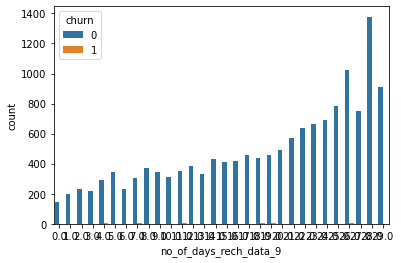

In [75]:
sns.countplot(data=telecom_data, x= 'no_of_days_rech_data_9', hue='churn')
plt.show()

From above plots we can see that churn rate is higher for customers who have recharged last at the end of corresponding month

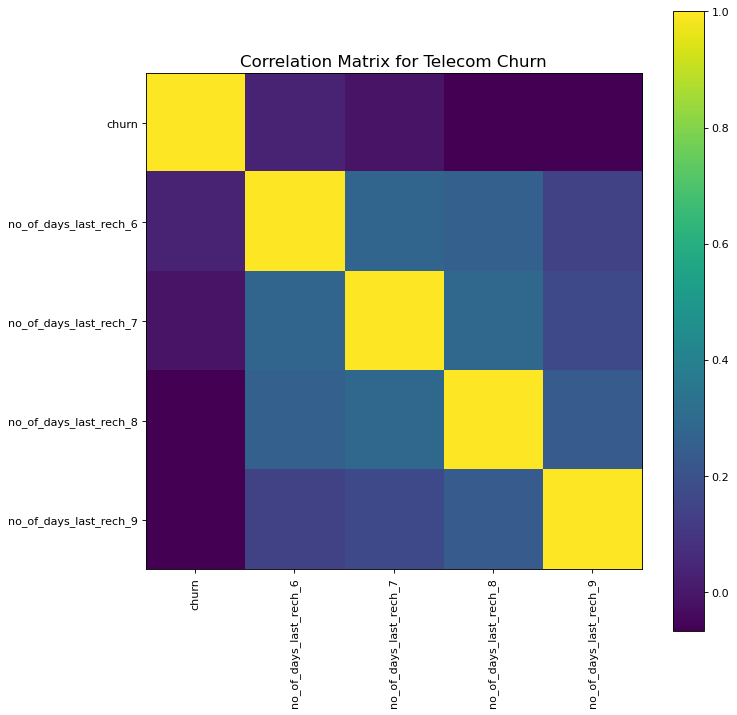

In [76]:
day_cols = ['churn','no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8','no_of_days_last_rech_9','no_of_days_rech_data_9']
day_cols
plotCorrelationMatrix(telecom_data[day_cols], 10)

In [77]:
# since there is no correlation between days and churn rate, we will drop these columns
telecom_data.drop(['no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8','no_of_days_last_rech_9','no_of_days_rech_data_9'], axis=1, inplace=True)
telecom_data.shape

(27121, 118)

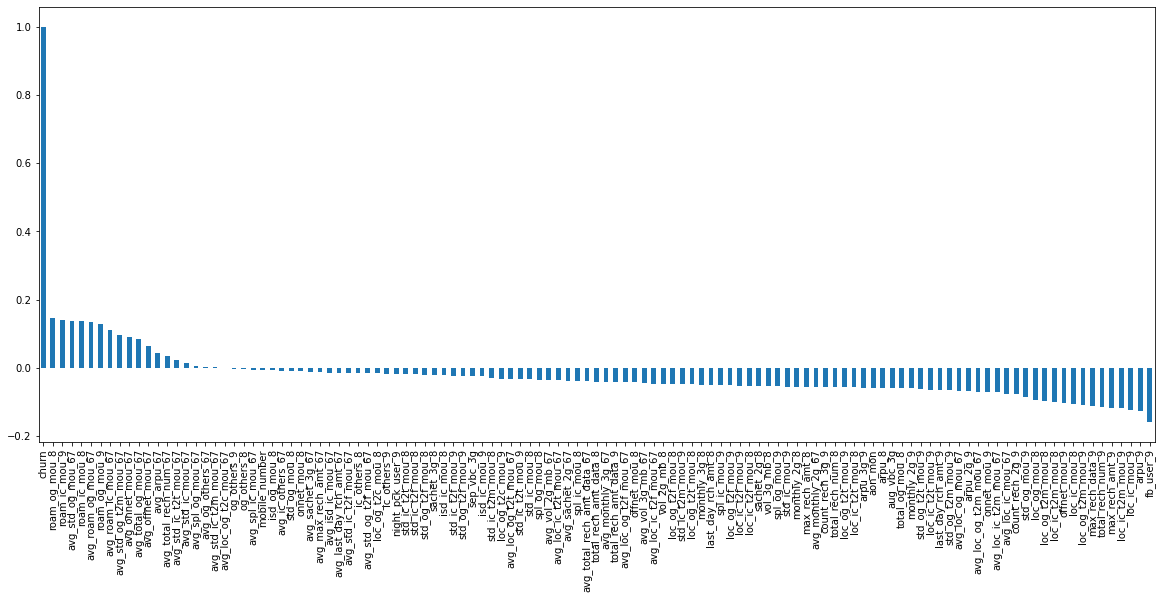

In [78]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,8))
telecom_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

- Roaming Outgoing for 8th month, 9th month and Average standard outgoing minutes of usage for good phase is positively correlated to churn
- Average usage in 8th month and FB usage for 9th month is negatively related to churn

## Model Building

In [79]:
df_telecom = telecom_data.copy()
df_telecom.drop(['tenure_range','mobile_number'], axis=1, inplace=True)
df_telecom.head()

arpu_8   arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  \
8   137.362  166.787        35.08        33.46        136.48        108.71   
21  637.760  578.596        85.14       161.63        983.39        869.89   
23  366.966  811.480        33.58        15.74        205.89        111.88   
33  409.230  799.356         0.00         0.00          0.00          0.00   
38  393.909  391.709       666.38       494.79         97.81        213.24   

    roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  \
8             0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
33            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
8              12.49             26.13             50.54             34.58   
21             23.34             29.98            104.81            107.54   
23             33.58             15.74            148.56             83.73   
33              0.00              0.00              0.00              0.00   
38              9.48             16.39             18.96             49.96   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
8               0.00              0.00              7.15              0.00   
21              1.58              0.00              0.00              0.00   
23              0.00              2.45             17.71              4.08   
33              0.00              0.00              0.56              0.00   
38              0.00              0.00              0.00              0.00   

    loc_og_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_8  \
8          63.04              7.33             74.13               0.0   
21        129.74            131.64            762.34               0.0   
23        182.14              0.00             11.44               0.0   
33          0.00              0.00              0.00               0.0   
38         28.44            478.39            163.16               0.0   

    std_og_t2f_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  spl_og_mou_8  \
8               0.00         98.28         81.46           0.0         10.23   
21              0.00        938.79        893.99           0.0          0.00   
23              3.89         39.61         15.34           0.0         17.71   
33              0.00          0.00          0.00           0.0          0.56   
38              0.00        735.74        641.56           0.0          0.00   

    spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  loc_ic_t2t_mou_8  \
8           0.00          0.0          0.0          171.56              0.31   
21          0.00          0.0          0.0         1068.54             19.54   
23         10.35          0.0          0.0          239.48             76.64   
33          0.00          0.0          0.0            0.56              2.45   
38          0.11          0.0          0.0          764.19              1.36   

    loc_ic_t2t_mou_9  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_8  \
8               4.03             15.48             17.34              0.00   
21             17.99            129.16            113.46             10.39   
23             45.36            146.84             75.83              0.71   
33              0.41             37.93              8.01              0.16   
38             18.56             28.06             31.74              0.00   

    loc_ic_t2f_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_8  \
8               0.00         15.79         21.38              0.10   
21              8.41        159.11        139.88              0.18   
23              0.00        224.21        121.19             13.38   
33              9.81         40.54         18

In [80]:
df_telecom.shape

(27121, 116)

In [81]:
y = df_telecom.pop('churn')

In [82]:
y.head()

8     0
21    0
23    0
33    0
38    0
Name: churn, dtype: int32

In [83]:
cols_list = df_telecom.select_dtypes(include=['int64','float64']).columns
cols_list

Index(['arpu_8', 'arpu_9', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_8',
       'roam_og_mou_9',
       ...
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67',
       'avg_vol_3g_mb_67', 'avg_monthly_2g_67', 'avg_sachet_2g_67',
       'avg_monthly_3g_67', 'avg_sachet_3g_67', 'avg_total_rech_amt_data_67',
       'aon_mon'],
      dtype='object', length=115)

In [84]:
X_vars = df_telecom
X_vars.shape

(27121, 115)

In [85]:
rem_cols = X_vars.select_dtypes(exclude=['int64','float64']).columns
print(rem_cols)

Index([], dtype='object')


In [86]:
X_vars.drop(rem_cols, axis=1, inplace=True)
X_vars.shape

(27121, 115)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_vars, y, test_size=0.3, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((18984, 115), (8137, 115))

In [89]:
# scale the variables
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = X_vars.columns
X_train.head()

arpu_8    arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  \
0 -0.146828 -0.178280    -0.294758    -0.405894      0.068675      0.000125   
1  0.577057 -0.429002    -0.466593    -0.488269      0.007287      0.061609   
2 -1.066557  0.134662    -0.536433    -0.066271     -0.725057     -0.643422   
3 -0.670438 -0.576193    -0.361713    -0.188191     -0.192866     -0.310252   
4  0.397253  1.078699    -0.481911    -0.393278      0.284677      0.645423   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  \
0      -0.169972      -0.169718       -0.19172      -0.181567   
1      -0.169972      -0.169718       -0.19172      -0.181567   
2      -0.169972      -0.081029       -0.19172       0.282338   
3      -0.169972      -0.169718       -0.19172      -0.181567   
4      -0.169972      -0.169718       -0.19172      -0.181567   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0          0.114884         -0.133968          0.963097          0.721794   
1         -0.303673         -0.305210         -0.098316         -0.089169   
2         -0.359211         -0.345945         -0.687202         -0.606480   
3         -0.344953         -0.347650         -0.590602         -0.591075   
4         -0.251935         -0.108979          1.280001          1.907072   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0         -0.303549         -0.246033         -0.165924         -0.240303   
1          0.460983          0.056171          0.643877          2.167358   
2         -0.303549         -0.294100         -0.246626         -0.240303   
3         -0.303549         -0.191303         -0.246626         -0.240303   
4         -0.303549         -0.286961          0.053919          1.108361   

   loc_og_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_8  \
0      0.673490         -0.372674         -0.382023         -0.141295   
1     -0.229886         -0.367955          0.113559         -0.141295   
2     -0.685499          0.029883         -0.356804         -0.141295   
3     -0.614482          0.004091          0.046516         -0.088381   
4      0.644087         -0.372674         -0.353364         -0.141295   

   std_og_t2f_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  spl_og_mou_8  \
0         -0.128155     -0.521322     -0.500461     -0.038175     -0.293118   
1         -0.128155     -0.169397     -0.168441     -0.038175     -0.022635   
2         -0.128155     -0.522271     -0.220064     -0.038175     -0.343803   
3         -0.128155     -0.018251      0.030754     -0.038175     -0.145582   
4         -0.128155     -0.472784     -0.481440     -0.038175     -0.164150   

   spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  loc_ic_t2t_mou_8  \
0     -0.330240    -0.017149    -0.016177       -0.117957          0.326032   
1      0.965102    -0.017149    -0.016177       -0.273251         -0.275014   
2      0.015964    -0.017149    -0.016177       -0.831918         -0.416821   
3     -0.345445    -0.017149    -0.016177       -0.344922         -0.394254   
4      0.689074     0.524886     0.325557       -0.084539         -0.304109   

   loc_ic_t2t_mou_9  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_8  \
0          0.402326          2.085662          2.100180         -0.090073   
1         -0.252929          0.035698          0.248770          0.045497   
2         -0.347442         -0.734506         -0.703588         -0.347812   
3         -0.329233         -0.472257         -0.322587         -0.323244   
4         -0.178878          0.324483          0.485596          1.460829   

   loc_ic_t2f_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_8  \
0         -0.014789      1.601053      1.642328         -0.208677   
1         -0.114291     -0.112925      0.014170         -0.208677   
2         -0.313885     -0.777710     -0.717586         -0.208677   
3         -0.313885     -0.580792     -0.448688         -0.126996   
4          1.790

In [91]:
X_train.describe()

arpu_8        arpu_9   onnet_mou_8   onnet_mou_9  offnet_mou_8  \
count  1.898400e+04  1.898400e+04  1.898400e+04  1.898400e+04  1.898400e+04   
mean  -4.554435e-17  5.229903e-17 -1.046478e-16 -9.317066e-17  3.945783e-17   
std    1.000026e+00  1.000026e+00  1.000026e+00  1.000026e+00  1.000026e+00   
min   -1.755155e+00 -3.875149e+00 -5.364334e-01 -5.165573e-01 -7.250574e-01   
25%   -5.332507e-01 -5.280183e-01 -5.006887e-01 -4.869436e-01 -5.915947e-01   
50%   -1.696151e-01 -1.603069e-01 -3.691114e-01 -3.617395e-01 -3.008063e-01   
75%    2.913498e-01  2.911279e-01  3.116385e-02  1.652295e-02  2.176620e-01   
max    6.585938e+01  7.511996e+01  2.111087e+01  1.753655e+01  2.762583e+01   

       offnet_mou_9  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  \
count  1.898400e+04   1.898400e+04   1.898400e+04   1.898400e+04   
mean   3.614921e-17  -6.127748e-16  -3.496817e-16   1.304997e-16   
std    1.000026e+00   1.000026e+00   1.000026e+00   1.000026e+00   
min   -7.177164e-01  -1.699717e-01  -1.697180e-01  -1.917204e-01   
25%   -6.001824e-01  -1.699717e-01  -1.697180e-01  -1.917204e-01   
50%   -3.126288e-01  -1.699717e-01  -1.697180e-01  -1.917204e-01   
75%    2.088316e-01  -1.699717e-01  -1.697180e-01  -1.917204e-01   
max    2.155715e+01   5.175261e+01   4.696534e+01   4.822133e+01   

       roam_og_mou_9  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  \
count   1.898400e+04      1.898400e+04      1.898400e+04      1.898400e+04   
mean   -2.471217e-16      5.444970e-17     -2.142475e-16      1.193034e-16   
std     1.000026e+00      1.000026e+00      1.000026e+00      1.000026e+00   
min    -1.815674e-01     -3.592107e-01     -3.531684e-01     -6.872017e-01   
25%    -1.815674e-01     -3.394034e-01     -3.366588e-01     -6.028143e-01   
50%    -1.815674e-01     -2.532160e-01     -2.518453e-01     -3.531775e-01   
75%    -1.815674e-01     -2.135530e-02     -2.016154e-02      2.173638e-01   
max     4.553237e+01      4.130682e+01      3.455626e+01      2.025958e+01   

       loc_og_t2m_mou_9  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  \
count      1.898400e+04      1.898400e+04      1.898400e+04      1.898400e+04   
mean       3.484945e-17      4.898748e-16      2.310874e-16      2.801392e-16   
std        1.000026e+00      1.000026e+00      1.000026e+00      1.000026e+00   
min       -6.625102e-01     -3.035493e-01     -2.940997e-01     -2.466259e-01   
25%       -5.900174e-01     -3.035493e-01     -2.940997e-01     -2.466259e-01   
50%       -3.474435e-01     -2.957974e-01     -2.940997e-01     -2.466259e-01   
75%        1.898416e-01     -8.891822e-02     -9.707258e-02     -2.257548e-01   
max        1.808441e+01      4.468128e+01      4.384236e+01      4.870741e+01   

       loc_og_t2c_mou_9  loc_og_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_9  \
count      1.898400e+04  1.898400e+04      1.898400e+04      1.898400e+04   
mean       1.956356e-16  1.987220e-17      6.788127e-16     -2.978066e-16   
std        1.000026e+00  1.000026e+00      1.000026e+00      1.000026e+00   
min       -2.403026e-01 -6.854993e-01     -3.726735e-01     -3.920587e-01   
25%       -2.403026e-01 -5.947854e-01     -3.726735e-01     -3.920587e-01   
50%       -2.403026e-01 -3.362080e-01     -3.698165e-01     -3.633998e-01   
75%       -2.403026e-01  2.160897e-01     -1.628636e-01     -8.338022e-02   
max        4.256965e+01  2.692216e+01      1.709923e+01      2.605132e+01   

       std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_8  std_og_mou_9  \
count      1.898400e+04      1.898400e+04  1.898400e+04  1.898400e+04   
mean      -5.739252e-16     -6.994218e-16 -2.274951e-18  3.084080e-16   
std        1.000026e+00      1.000026e+00  1.000026e+00  1.000026e+00   
min       -1.412946e-01     -1.281548e-01 -5.222709e-01 -5.071224e-01   
25%       -1.412946e-01     -1.281548e-01 -5.221744e-01 -5.071224e-01   
50%       -1.412946e-01     -1.281548e-01 -4.639842e-01 -4.564437e-01   
75%       -1.412946e-01     -1.281548e-01  1.20716

In [92]:
### Checking the Churn Rate
churn = (sum(telecom_data['churn'])/len(telecom_data['churn'].index))*100
churn

2.673205265292578

- Churn rate is 3%

## Logistic Regression

In [93]:
import statsmodels.api as sm

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=35)             # running RFE with 35 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('arpu_9', True, 1),
 ('onnet_mou_8', False, 2),
 ('onnet_mou_9', True, 1),
 ('offnet_mou_8', False, 3),
 ('offnet_mou_9', True, 1),
 ('roam_ic_mou_8', False, 3),
 ('roam_ic_mou_9', True, 1),
 ('roam_og_mou_8', False, 3),
 ('roam_og_mou_9', True, 1),
 ('loc_og_t2t_mou_8', False, 3),
 ('loc_og_t2t_mou_9', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2m_mou_9', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2f_mou_9', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_t2c_mou_9', False, 2),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2t_mou_9', True, 1),
 ('std_og_t2m_mou_9', True, 1),
 ('std_og_t2f_mou_8', False, 3),
 ('std_og_t2f_mou_9', True, 1),
 ('std_og_mou_8', False, 3),
 ('std_og_mou_9', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('spl_og_mou_9', True, 1),
 ('og_others_8', True, 1),
 ('og_others_9', False, 3),
 ('total_og_mou_8', False, 3),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2t_mou_9', True, 1),
 ('loc_ic_t2m_mou_

In [97]:
col = X_train.columns[rfe.support_]

In [98]:
y_train_sd = y_train.values.reshape(-1,1)

In [99]:
X_train_sm = sm.add_constant(X_train[col])
X_train_sm.shape, y_train_sd.shape

((18984, 58), (18984, 1))

In [100]:
logm2 = sm.GLM(y_train_sd,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                18984
Model:                            GLM   Df Residuals:                    18926
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 13 Apr 2022   Deviance:                       50565.
Time:                        22:03:14   Pearson chi2:                 2.47e+18
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.961e+15   4.87e+05  -4.03e+09      0.000   -1.96e+15   -1.96e+15
arpu_8                      8.049e+13   1.05e+06   7.65e+07      0.000    8.05e+13    8.05e+13
arpu_9                     -8.456e+13   1.34e+06  -6.29e+07      0.000   -8.46e+13   -8.46e+13
onnet_mou_9                 1.399e+15   1.58e+07   8.84e+07      0.000     1.4e+15     1.4e+15
offnet_mou_9                1.766e+15   1.47e+07    1.2e+08      0.000    1.77e+15    1.77e+15
roam_ic_mou_9               9.275e+13   5.95e+05   1.56e+08      0.000    9.28e+13    9.28e+13
roam_og_mou_9              -2.947e+14   3.12e+06  -9.45e+07      0.000   -2.95e+14   -2.95e+14
loc_og_t2t_mou_9            -8.96e+14   7.93e+06  -1.13e+08      0.000   -8.96e+14   -8.96e+14
loc_og_t2m_mou_8           -2.283e+14   1.03e+06  -2.22e+08      0.000   -2.28e+14   -2.28e+14
loc_og_t2m_mou_9           -1.008e+15   7.36e+06  -1.37e+08      0.000   -1.01e+15   -1.01e+15
loc_og_t2f_mou_8           -9.415e+12   1.02e+06  -9.23e+06      0.000   -9.42e+12   -9.42e+12
loc_og_t2f_mou_9           -1.341e+14    1.1e+06  -1.21e+08      0.000   -1.34e+14   -1.34e+14
loc_og_t2c_mou_8           -8.498e+12   5.65e+05  -1.51e+07      0.000    -8.5e+12    -8.5e+12
std_og_t2t_mou_9            9.864e+18   4.16e+10   2.37e+08      0.000    9.86e+18    9.86e+18
std_og_t2m_mou_9            9.996e+18   4.21e+10   2.37e+08      0.000       1e+19       1e+19
std_og_t2f_mou_9            3.302e+17   1.39e+09   2.37e+08      0.000     3.3e+17     3.3e+17
std_og_mou_9               -1.506e+19   6.35e+10  -2.37e+08      0.000   -1.51e+19   -1.51e+19
isd_og_mou_8               -1.664e+14   1.14e+06  -1.46e+08      0.000   -1.66e+14   -1.66e+14
spl_og_mou_8               -4.977e+13   6.89e+05  -7.23e+07      0.000   -4.98e+13   -4.98e+13
spl_og_mou_9               -1.694e+14   7.52e+05  -2.25e+08      0.000   -1.69e+14   -1.69e+14
og_others_8                -3.472e+13   4.89e+05   -7.1e+07      0.000   -3.47e+13   -3.47e+13
loc_ic_t2t_mou_9            3.637e+18    1.3e+10   2.79e+08      0.000    3.64e+18    3.64e+18
loc_ic_t2m_mou_8           -3.495e+12   1.49e+06  -2.34e+06      0.000   -3.49e+12   -3.49e+12
loc_ic_t2m_mou_9              4.6e+18   1.65e+10   2.79e+08      0.000     4.6e+18     4.6e+18
loc_ic_t2f_mou_8            1.024e+13   1.01e+06   1.01e+07      0.000    1.02e+13    1.02e+13
loc_ic_t2f_mou_9            1.124e+18   4.02e+09   2.79e+08      0.000    1.12e+18    1.12e+18
loc_ic_mou_8               -6.358e+13   1.56e+06  -4.08e+07      0.000   -6.36e+13   -6.36e+13
loc_ic_mou_9               -6.763e+18   2.42e+10  -2.79e+08      0.000   -6.76e+18   -6.76e+18
std_ic_t2t_mou_8            1.452e+13    9.4e+05   1.55e+07      0.000    1.45e+13    1.45e+13
std_ic_t2t_mou_9            4.001e+17   7.2

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_pred':y_train_pred})
y_train_pred_final['cust_id'] = y_train.index
y_train_pred_final.head()

churn  churn_pred  cust_id
0      0         0.0    77681
1      0         0.0    94908
2      0         0.0     1563
3      0         0.0    90084
4      0         0.0    91255

In [104]:
y_train_pred_final['churn_pred'].value_counts(normalize=True)

0.0    0.987305
1.0    0.012695
Name: churn_pred, dtype: float64

In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.churn_pred )
print(confusion)

[[18328   134]
 [  415   107]]


In [107]:
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.churn_pred))

0.9710809102402023


The accuracy for train dataset is 97% which is pretty good

In [108]:
# applying model on test data
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = X_vars.columns
X_test.head()

arpu_8    arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  \
0 -0.042759 -0.817404    -0.278399    -0.418962     -0.148237     -0.451064   
1  0.026724  0.140750     0.503710     1.449791      0.444290     -0.385173   
2 -0.569643 -0.616989    -0.433311    -0.445756     -0.239621     -0.623547   
3  0.193693 -0.284420    -0.531747    -0.505618     -0.604872     -0.639663   
4  0.338905  1.365152     0.272644     0.856521      0.922055      1.068916   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  \
0      -0.169972      -0.169718      -0.191720      -0.181567   
1       2.599110      -0.169718       0.958319      -0.181567   
2      -0.169972      -0.169718      -0.191720      -0.181567   
3      -0.169972      -0.169718      -0.191720      -0.181567   
4       0.048312      -0.169718       0.306558      -0.181567   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         -0.124810         -0.288655          0.144070         -0.375840   
1         -0.293855         -0.197539         -0.537700         -0.286758   
2         -0.156314         -0.216381          0.320212         -0.507791   
3         -0.349990         -0.331500         -0.463604         -0.515620   
4         -0.117340          0.559614          1.036391          1.316718   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0         -0.303549         -0.294100         -0.246626         -0.238745   
1         -0.303549         -0.294100         -0.051828          0.150592   
2         -0.243956         -0.294100         -0.246626         -0.240303   
3         -0.192116         -0.226996         -0.246626         -0.240303   
4         -0.303549         -0.294100         -0.246626         -0.240303   

   loc_og_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_8  \
0     -0.003730         -0.297420         -0.248092         -0.141295   
1     -0.548149          1.812003         -0.230115         -0.141295   
2      0.092575         -0.370681         -0.387791         -0.141295   
3     -0.530009         -0.372674         -0.392059          0.203903   
4      0.573233          0.683073          0.537313         -0.141295   

   std_og_t2f_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  spl_og_mou_8  \
0         -0.128155     -0.278072     -0.362262     -0.032317     -0.343803   
1         -0.128155      0.887807      1.031245     -0.038175     -0.185226   
2         -0.128155     -0.522271     -0.502985     -0.038175     -0.183721   
3         -0.128155     -0.515659     -0.507122     -0.038175     -0.274551   
4         -0.128155      0.550571      0.801200     -0.038175     -0.126011   

   spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  loc_ic_t2t_mou_8  \
0     -0.344860    -0.017149    -0.016177       -0.259215         -0.240387   
1     -0.062984    -0.017149    -0.016177        0.487200          0.360535   
2      0.268015    -0.017149    -0.016177       -0.419925         -0.282040   
3     -0.345445    -0.017149    -0.016177       -0.742694         -0.389840   
4     -0.153629    -0.017149    -0.016177        0.778918          0.336290   

   loc_ic_t2t_mou_9  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_8  \
0         -0.230032          0.139297         -0.604389         -0.328158   
1          0.127435         -0.513781          0.179909         -0.329275   
2         -0.347929         -0.425171         -0.440422         -0.325254   
3         -0.325214         -0.212081         -0.337660         -0.252221   
4          0.419377         -0.110886          0.127179         -0.324808   

   loc_ic_t2f_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_8  \
0         -0.285316     -0.077638     -0.582220          0.200146   
1         -0.302852     -0.214450      0.140594         -0.130359   
2         -0.312309     -0.489639     -0.538594         -0.208677   
3         -0.296941     -0.388049     -0.453929         -0.208677   
4         -0.111

In [109]:
X_test_sm = sm.add_constant(X_test[col])

In [110]:
X_test_sm.shape

(8137, 58)

In [111]:
y_test_sd = y_test.values.reshape(-1,1)

In [112]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_pred':y_test_pred})
y_test_pred_final['cust_id'] = y_test.index
y_test_pred_final.head()

churn  churn_pred  cust_id
0      0         0.0    94246
1      0         0.0    61430
2      0         0.0    35910
3      0         0.0    24295
4      0         0.0    96134

In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.churn_pred))

0.9744377534717955


In [114]:
confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.churn_pred)
confusion

array([[7873,   61],
       [ 147,   56]], dtype=int64)

- with 35 variables selected, model performs equally well on test data.

## PCA for model building

In [115]:
from sklearn.neighbors import DistanceMetric

In [116]:
#handling imbalance using SMOTE technique
from imblearn.over_sampling import SMOTE

In [117]:
print("before balancing")
(y_train.value_counts(normalize=True))

before balancing


0    0.972503
1    0.027497
Name: churn, dtype: float64

In [118]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [119]:
print("after balancing")
(y_train_smt.value_counts(normalize=True))

after balancing


0    0.5
1    0.5
Name: churn, dtype: float64

In [120]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA(random_state=100)

In [122]:
pca.fit(X_train_smt)

PCA(random_state=100)

In [123]:
pca.components_

array([[ 4.32990796e-02,  3.13965683e-02,  1.99654606e-02, ...,
        -1.57495974e-02, -2.44148266e-02,  1.21045107e-02],
       [ 2.07792221e-01,  2.18815341e-01,  9.72881618e-02, ...,
         1.17817276e-02,  3.64089261e-02,  9.07965090e-02],
       [ 8.95434158e-02,  2.03546912e-02,  1.81049917e-01, ...,
        -4.04774140e-02, -9.28857486e-02, -5.46359509e-02],
       ...,
       [-5.09146119e-07, -3.10859706e-07,  6.36036827e-06, ...,
         2.79571007e-08, -5.01814409e-08,  9.29827450e-08],
       [ 9.67260761e-07, -1.62450052e-07, -2.58407104e-06, ...,
        -1.28143351e-07,  1.43331463e-07, -3.71599869e-07],
       [-2.93880104e-07,  8.50385701e-07,  7.97365169e-06, ...,
         1.48450170e-08,  3.51912817e-08, -3.66324612e-08]])

In [124]:
pca.explained_variance_ratio_

array([1.31913832e-01, 9.67634125e-02, 7.74647982e-02, 4.44585961e-02,
       4.13566140e-02, 3.73901816e-02, 3.27004503e-02, 3.01162339e-02,
       2.59227658e-02, 2.44407922e-02, 2.00968480e-02, 1.88879050e-02,
       1.76247909e-02, 1.74479606e-02, 1.62144825e-02, 1.55158964e-02,
       1.42768323e-02, 1.35093731e-02, 1.23452551e-02, 1.21589936e-02,
       1.15743232e-02, 1.11319861e-02, 1.03261618e-02, 1.00335470e-02,
       9.70205658e-03, 9.48737493e-03, 9.19404003e-03, 8.73596235e-03,
       8.67385796e-03, 8.27431382e-03, 8.06954936e-03, 7.56365026e-03,
       7.34269693e-03, 7.18850101e-03, 6.71849345e-03, 6.49354218e-03,
       6.40597175e-03, 6.08058198e-03, 5.91902528e-03, 5.86942363e-03,
       5.79065115e-03, 5.57110503e-03, 5.18100931e-03, 4.97724701e-03,
       4.76314052e-03, 4.66178808e-03, 4.43977311e-03, 4.30241052e-03,
       4.22237312e-03, 3.95575732e-03, 3.85165245e-03, 3.61207611e-03,
       3.25722162e-03, 3.20460953e-03, 3.17718329e-03, 3.05216087e-03,
      

In [125]:
X_train_pca = pca.fit_transform(X_train_smt)

In [126]:
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_train_pca, y_train_smt)

# make the predictions
y_train_pred = lr_pca.predict(X_train_pca)

# convert prediction array into a dataframe
y_train_pred_df = pd.DataFrame(y_train_pred)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print("###Training Accuracy####")
print("Confusion Matrix")
print(confusion_matrix(y_train_smt,y_train_pred))
print("Accuracy of the logistic regression model for train set with PCA: ",accuracy_score(y_train_smt,y_train_pred))

###Training Accuracy####
Confusion Matrix
[[18429    33]
 [    0 18462]]
Accuracy of the logistic regression model for train set with PCA:  0.9991062723431914


In [128]:
# test data
X_test_pca = pca.transform(X_test)
# make the predictions
y_test_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)

In [129]:
print("###Test Accuracy####")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy of the logistic regression model for test set with PCA: ",accuracy_score(y_test,y_test_pred))

###Test Accuracy####
Confusion Matrix
[[7902   32]
 [   8  195]]
Accuracy of the logistic regression model for test set with PCA:  0.9950841833599606


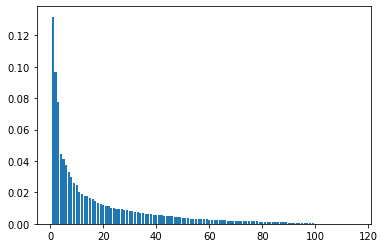

In [130]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [131]:
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [132]:
var_cumu

array([ 13.19,  22.87,  30.62,  35.07,  39.21,  42.95,  46.22,  49.23,
        51.82,  54.26,  56.27,  58.16,  59.92,  61.66,  63.28,  64.83,
        66.26,  67.61,  68.84,  70.06,  71.22,  72.33,  73.36,  74.36,
        75.33,  76.28,  77.2 ,  78.07,  78.94,  79.77,  80.58,  81.34,
        82.07,  82.79,  83.46,  84.11,  84.75,  85.36,  85.95,  86.54,
        87.12,  87.68,  88.2 ,  88.7 ,  89.18,  89.65,  90.09,  90.52,
        90.94,  91.34,  91.73,  92.09,  92.42,  92.74,  93.06,  93.37,
        93.67,  93.96,  94.24,  94.51,  94.76,  95.  ,  95.24,  95.48,
        95.71,  95.93,  96.14,  96.35,  96.54,  96.72,  96.9 ,  97.08,
        97.25,  97.42,  97.59,  97.75,  97.91,  98.07,  98.22,  98.36,
        98.49,  98.61,  98.73,  98.85,  98.97,  99.08,  99.19,  99.29,
        99.39,  99.47,  99.55,  99.63,  99.7 ,  99.77,  99.83,  99.88,
        99.93,  99.98, 100.02, 100.03, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03,
      

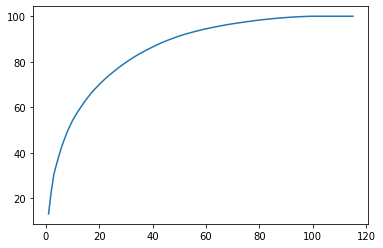

In [133]:
# SCREE plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

In [134]:
# 99% of variance is explained by.
# lets take number of components to be 80
# PCA with 80 components
pca_80 = PCA(n_components=80)

df_tr_pca_80 = pca_80.fit_transform(X_train_smt)
print(df_tr_pca_80.shape)

df_test_pca_80 = pca_80.transform(X_test)
print(df_test_pca_80.shape)

(36924, 80)
(8137, 80)


In [135]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_80, y_train_smt)

# Predicted probabilities
y_test_pred_80 = lr_pca1.predict(df_test_pca_80)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_test_pred_80)
print(confusion_matrix(y_test,y_test_pred_80))
print("Accuracy with 80 PCAs: ",accuracy_score(y_test,y_test_pred_80))

[[7862   72]
 [  14  189]]
Accuracy with 80 PCAs:  0.9894309942239154


- Accuracy has come close to 99% which is very good

## Decision Tree

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_vars, y, test_size=0.3, train_size=0.7, random_state=42)

In [143]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=25, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.99      1.00      0.99       203

    accuracy                           1.00      8137
   macro avg       0.99      1.00      1.00      8137
weighted avg       1.00      1.00      1.00      8137



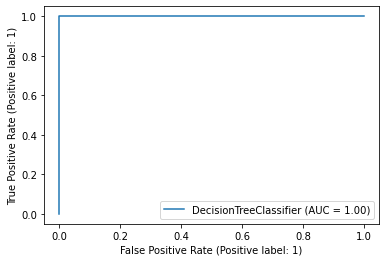

In [144]:
# Plotting ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [146]:
# Tuning Hyperparameter

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [147]:
grid_search.best_score_

0.9999473240623683

In [148]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [149]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.99      1.00      0.99       203

    accuracy                           1.00      8137
   macro avg       0.99      1.00      1.00      8137
weighted avg       1.00      1.00      1.00      8137



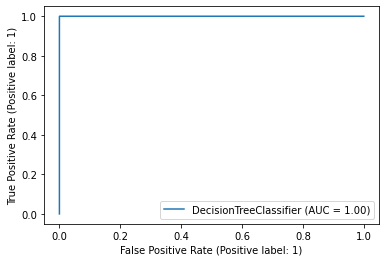

In [150]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

We are getting an accuracy of 99% on test data, with decission tree

### Random Forest

Train accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.97      0.98      0.97       203

    accuracy                           1.00      8137
   macro avg       0.98      0.99      0.99      8137
weighted avg       1.00      1.00      1.00      8137



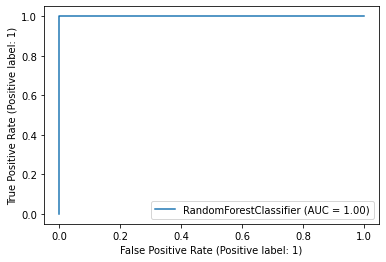

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [162]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [163]:
grid_search.best_score_

0.9996839443742098

In [164]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [165]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.97      0.99      0.98       203

    accuracy                           1.00      8137
   macro avg       0.99      0.99      0.99      8137
weighted avg       1.00      1.00      1.00      8137



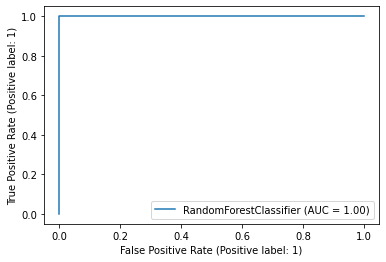

In [166]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

We are getting an accuracy of 99% on test data, with Random forest

### Adaboost

In [153]:
from sklearn.ensemble import AdaBoostClassifier

In [154]:
# Creating a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9943468108639548

In [155]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Looping through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

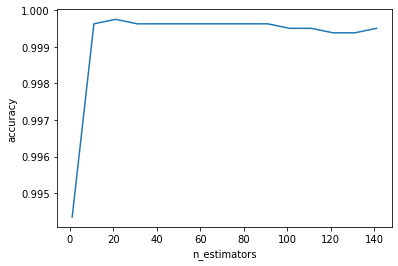

In [156]:
# Plotting the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [157]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.97      0.98      0.97       203

    accuracy                           1.00      8137
   macro avg       0.98      0.99      0.99      8137
weighted avg       1.00      1.00      1.00      8137



## Conclusion

- Given our business problems, we need a higher awareness to retain our customers. Providing offers to non-cancelling users is less costly than losing customers and acquiring new ones, so it's more likely to pinpoint true positives and require a recall.


- Comparing the  trained models, you can see that the tuned Random Forest and Adaboost perform best with the highest accuracy and highest recall i.e. 98% and 99% respectively. Therefore, because it is a relatively simple model, we choose Random Forest instead of Adaboost.

In [160]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1, random_state=25)

In [167]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18462
           1       1.00      1.00      1.00       522

    accuracy                           1.00     18984
   macro avg       1.00      1.00      1.00     18984
weighted avg       1.00      1.00      1.00     18984

Report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7934
           1       0.97      0.99      0.98       203

    accuracy                           1.00      8137
   macro avg       0.99      0.99      0.99      8137
weighted avg       1.00      1.00      1.00      8137



#### The top 10 predictors are:
- loc_og_mou_8
- total_rech_num_8
- monthly_3g_8
- monthly_2g_8
- gd_ph_loc_og_mou
- gd_ph_total_rech_num
- last_day_rch_amt_8
- std_ic_t2t_mou_8
- sachet_2g_8
- aon

#### Miscellaneous:


- Users under 4 years on the network should be monitored from time to time as the data show that they are more likely to churn.
- Users with a maximum recharge of less than 200, even in  good phases, are more likely to cancel and should be tagged and reassessed at any time.
- The MOU is one of the main factors, but  if the user does not use the data package, there are other factors to consider in the data, especially VBC.